# Project 2 - Programming for Data Analysis
## Ana Mello

An analysis of paleo-present climate data

• Analyse CO2 vs Temperature Anomaly from 800kyrs – present.

• Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)

• Examine Irish context:
o Climate change signals: (see Maynooth study: The emergence of a climate change
signal in long-term Irish meteorological observations - ScienceDirect)

• Fuse and analyse data from various data sources and format fused data set as a pandas
dataframe and export to csv and json formats

• For all of the above variables, analyse the data, the trends and the relationships between
them (temporal leads/lags/frequency analysis).

• Predict global temperature anomaly over next few decades (synthesise data) and compare to
published climate models if atmospheric CO2 trends continue

• Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)

Use a Jupyter notebook for your analysis and track your progress using GitHub.

Use an academic referencing style

*************************************************************************************************************************************************************************************************

In [87]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [89]:
import numpy as np 
import pandas as pd 

I am importing the pandas library, a powerful tool for data manipulation and analysis in Python.

In [90]:
df = pd.read_csv('climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


Next, I am using pandas to read data from a CSV file named 'climate_change_data.csv'. The data is loaded into a DataFrame, which is essentially a tabular data structure. I have assigned this DataFrame the variable name df.

Finally, I am using the head() method on the DataFrame df to display the first few rows of the loaded data. This gives me a quick overview of the structure and content of the dataset.


In [91]:
df.shape

(10000, 9)

This line of code retrieves the shape of the DataFrame df, which represents the number of rows and columns in the dataset. By executing this, I can quickly see the dimensions of the data, with the output being a tuple containing the number of rows followed by the number of columns.

In [92]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


Here, I'm using the describe() method on the DataFrame df. This method provides a summary of descriptive statistics for each column, including measures like mean, standard deviation, minimum, and maximum values. It's a useful way to get a statistical overview of the numerical features in the dataset.

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.3+ KB


The info() method gives a concise summary of the DataFrame, providing information about the data types, non-null values, and memory usage. It's helpful for understanding the structure of the dataset, such as the presence of missing values and the data types of each column.

In [94]:
df.dtypes

Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object

By using df.dtypes, I can inspect the data types of each column in the DataFrame df. This is valuable information to understand how the data is stored, especially when dealing with different types such as integers, floats, or objects (typically strings).

In [95]:
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

The expression df.isnull().sum() is checking for missing values in each column and summing them up. This helps me quickly identify which columns have missing data and how many missing values are present in each column.

In [96]:
df.duplicated().sum()

0

By using df.duplicated().sum(), I am checking for duplicated rows in the DataFrame. This provides information about how many rows are exact duplicates of each other. It's useful for identifying and handling duplicate entries in the dataset.

In [97]:
df['Country'].value_counts()

Country
Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: count, Length: 243, dtype: int64

Here, I am using value_counts() on the 'Country' column to get a count of unique values. This helps me understand the distribution of countries in the dataset, indicating which countries have more or fewer entries.

In [98]:
df['Location'].value_counts()

Location
North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: count, Length: 7764, dtype: int64

By using df['Location'].value_counts(), I am obtaining a count of unique values in the 'Location' column. This allows me to understand the distribution of different locations in the dataset and how frequently each location appears.

In [99]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [100]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


                            Date          Location        Country  \
0  2000-01-01 00:00:00.000000000   New Williamtown         Latvia   
1  2000-01-01 20:09:43.258325832      North Rachel   South Africa   
2  2000-01-02 16:19:26.516651665  West Williamland  French Guiana   
3  2000-01-03 12:29:09.774977497       South David        Vietnam   
4  2000-01-04 08:38:53.033303330    New Scottburgh        Moldova   

   Temperature  CO2 Emissions  Sea Level Rise  Precipitation   Humidity  \
0    10.688986     403.118903        0.717506      13.835237  23.631256   
1    13.814430     396.663499        1.205715      40.974084  43.982946   
2    27.323718     451.553155       -0.160783      42.697931  96.652600   
3    12.309581     422.404983       -0.475931       5.193341  47.467938   
4    13.210885     410.472999        1.135757      78.695280  61.789672   

   Wind Speed  
0   18.492026  
1   34.249300  
2   34.124261  
3    8.554563  
4    8.001164  


C:\Users\ana-m\AppData\Local\Temp\ipykernel_10784\983080777.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


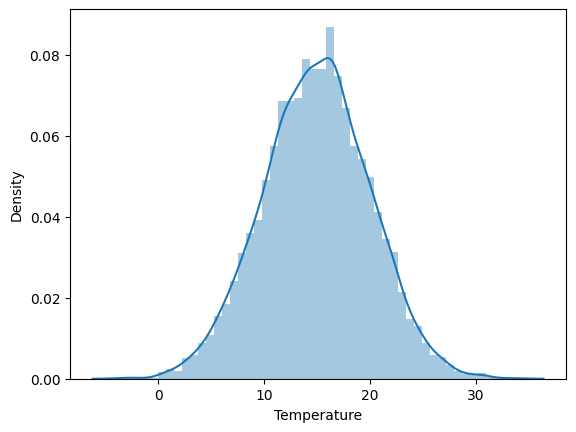

In [101]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('climate_change_data.csv')

print(df.head())

sns.distplot(df['Temperature'])
plt.show()



This line of code uses seaborn to create a distribution plot (distplot) for the 'Temperature' column in the DataFrame df. The distribution plot provides insights into the distribution of temperature values, including the shape of the distribution and central tendencies.

array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'CO2 Emissions'}>],
       [<Axes: title={'center': 'Sea Level Rise'}>,
        <Axes: title={'center': 'Precipitation'}>],
       [<Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>]], dtype=object)

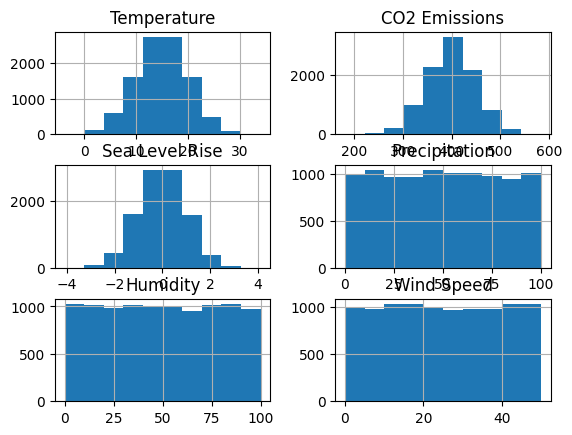

In [102]:
df.hist()

This line of code uses the hist() method on the DataFrame df to generate histograms for all numerical columns in the dataset. It provides a quick visual overview of the distribution of each numerical variable.

Text(0.5, 0, 'CO2 Emissions')

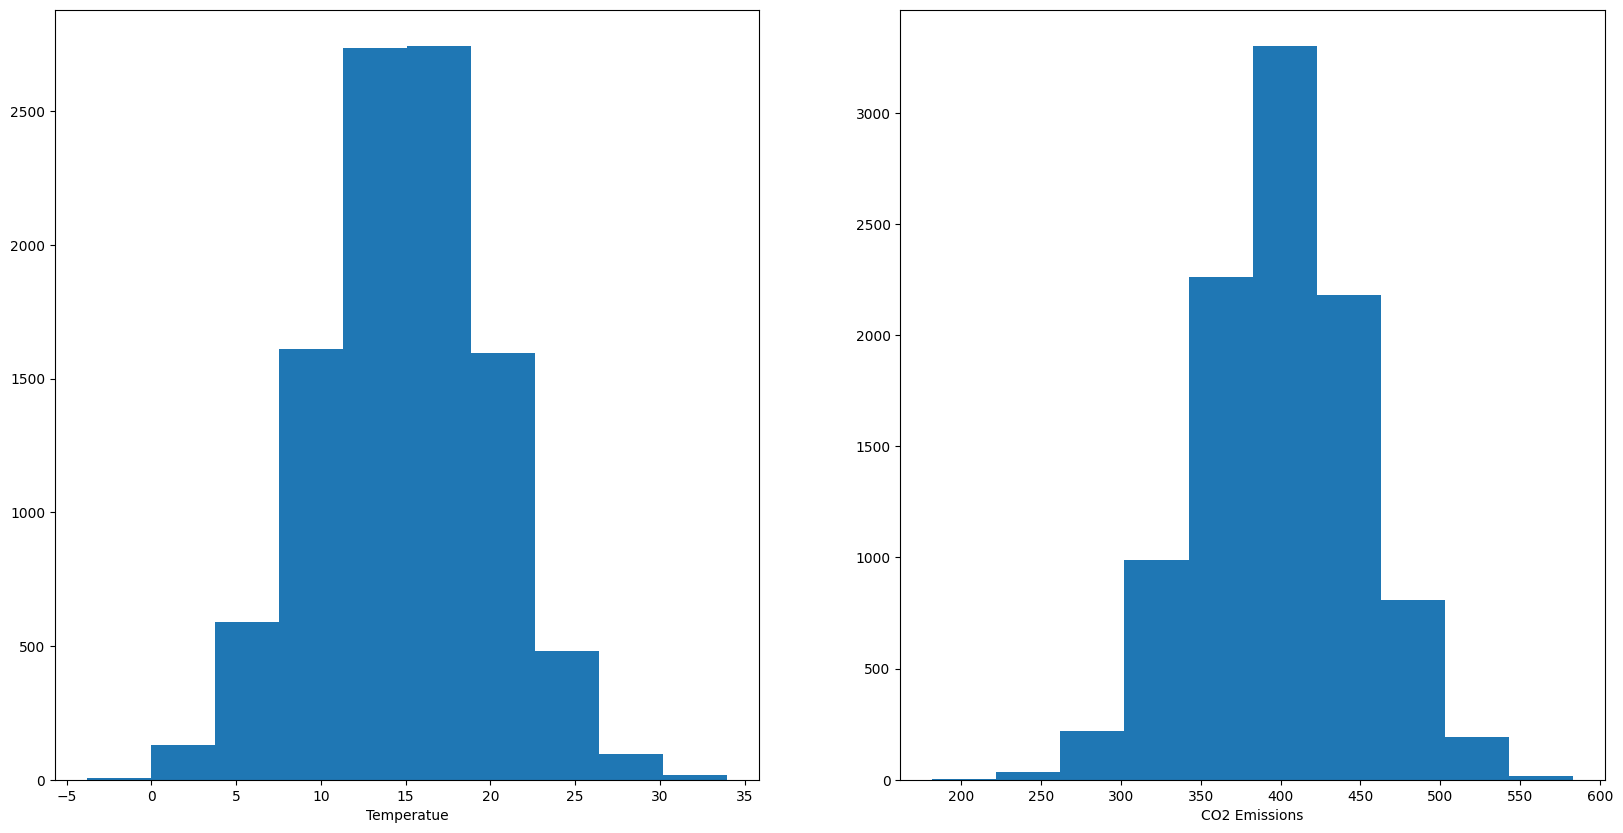

In [103]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(df['Temperature'])
plt.xlabel('Temperatue')
plt.subplot(1,2,2)
plt.hist(df['CO2 Emissions'])
plt.xlabel('CO2 Emissions')

Here, I am creating a figure with a size of 20x10 inches and then using subplot to arrange two histograms side by side. The first histogram represents the 'Temperature' column, and the second represents the 'CO2 Emissions' column. I'm also adding labels to the x-axis for better interpretation.

Text(0.5, 0, 'Precipitation')

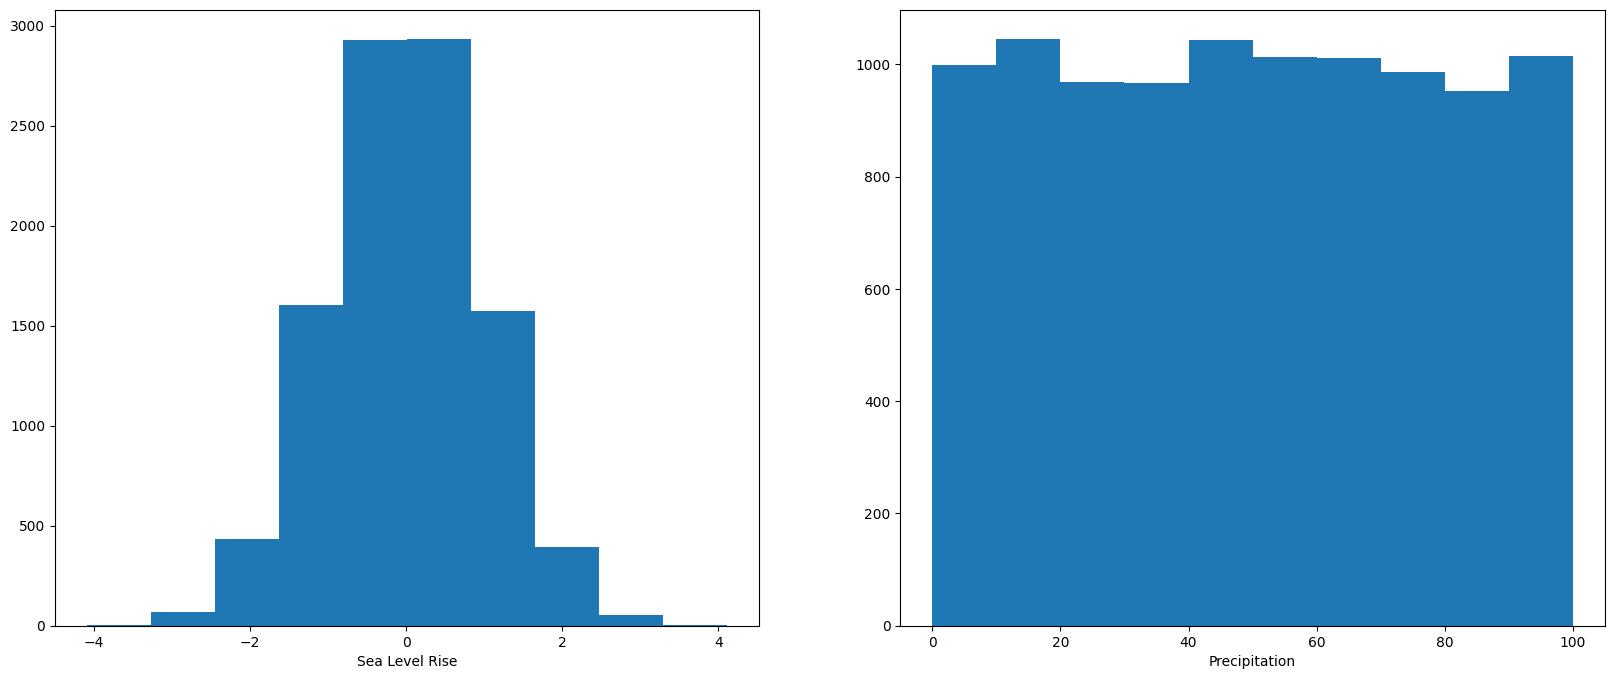

In [104]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['Sea Level Rise'])
plt.xlabel('Sea Level Rise')
plt.subplot(1,2,2)
plt.hist(df['Precipitation'])
plt.xlabel('Precipitation')

Similarly, in this block of code, I'm creating another figure with a size of 20x8 inches and arranging two histograms side by side. The first histogram represents the 'Sea Level Rise' column, and the second represents the 'Precipitation' column. I've added labels to the x-axis for clarity.

Text(0.5, 0, 'Wind Speed')

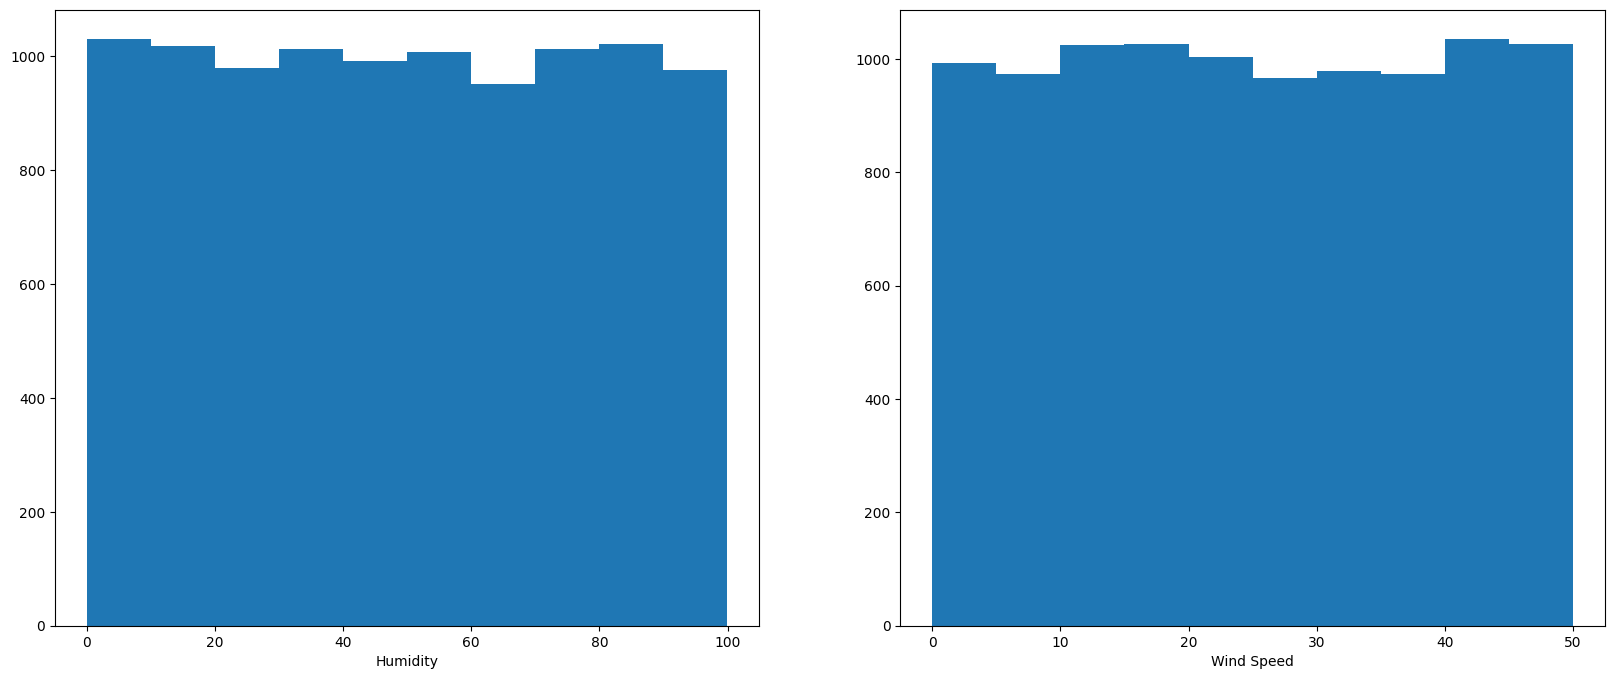

In [105]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['Humidity'])
plt.xlabel('Humidity')
plt.subplot(1,2,2)
plt.hist(df['Wind Speed'])
plt.xlabel('Wind Speed')

In this code block, I am creating a new figure with a size of 20x8 inches and arranging two histograms side by side. The first histogram represents the 'Humidity' column, and the second represents the 'Wind Speed' column. I'm adding labels to the x-axis for both histograms to improve interpretability.

Wind Speed and Humidity is nearly same

In [106]:
df['Date']=pd.to_datetime(df['Date'])

Here, I am converting the 'Date' column to a datetime format using the pd.to_datetime() function. This allows for easier manipulation and analysis of date-related information.

In [107]:
df['Date Only']=df['Date'].dt.date

Next, I am creating a new column named 'Date Only', which contains only the date part of the 'Date' column. This can be useful when analyzing or grouping data based on dates without considering the time component

In [108]:
df['Year']=df['Date'].dt.year

Now, the DataFrame has an additional column, 'Year', that represents the year for each corresponding date in the 'Date' column. This can be particularly useful when you want to analyze or group data based on the year component, allowing for more granular insights into yearly trends or patterns in the dataset.

In [109]:
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed,Date Only,Year
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026,2000-01-01,2000
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300,2000-01-01,2000
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261,2000-01-02,2000
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563,2000-01-03,2000
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164,2000-01-04,2000


<Axes: xlabel='Year', ylabel='CO2 Emissions'>

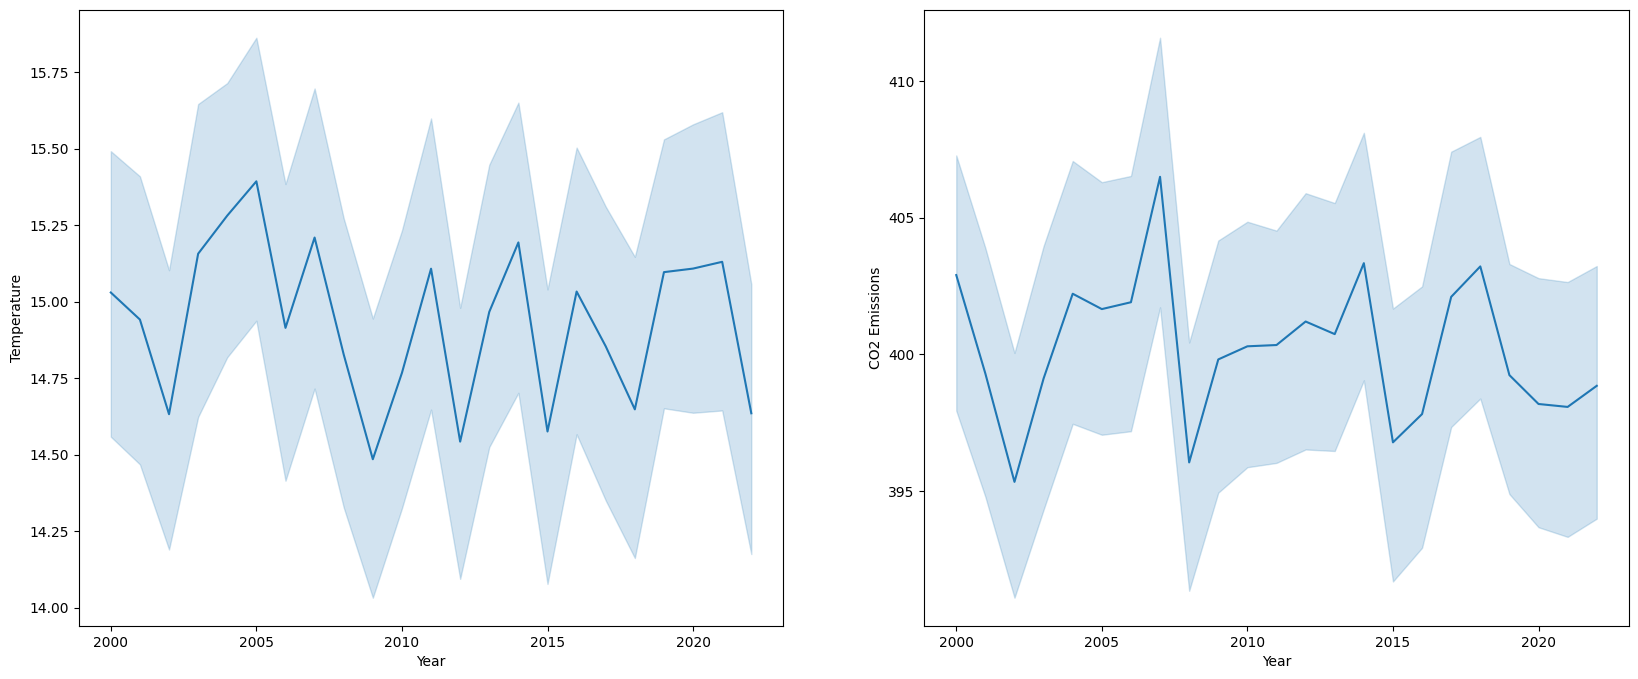

In [110]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Temperature',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='CO2 Emissions',data=df)

In this code block, I am creating a figure with a size of 20x8 inches and arranging two line plots side by side using sns.lineplot from the Seaborn library. The first line plot represents the relationship between 'Year' and 'Temperature', while the second one shows the relationship between 'Year' and 'CO2 Emissions'. This visual representation helps in understanding trends and patterns over the years for these variables.

<Axes: xlabel='Year', ylabel='Precipitation'>

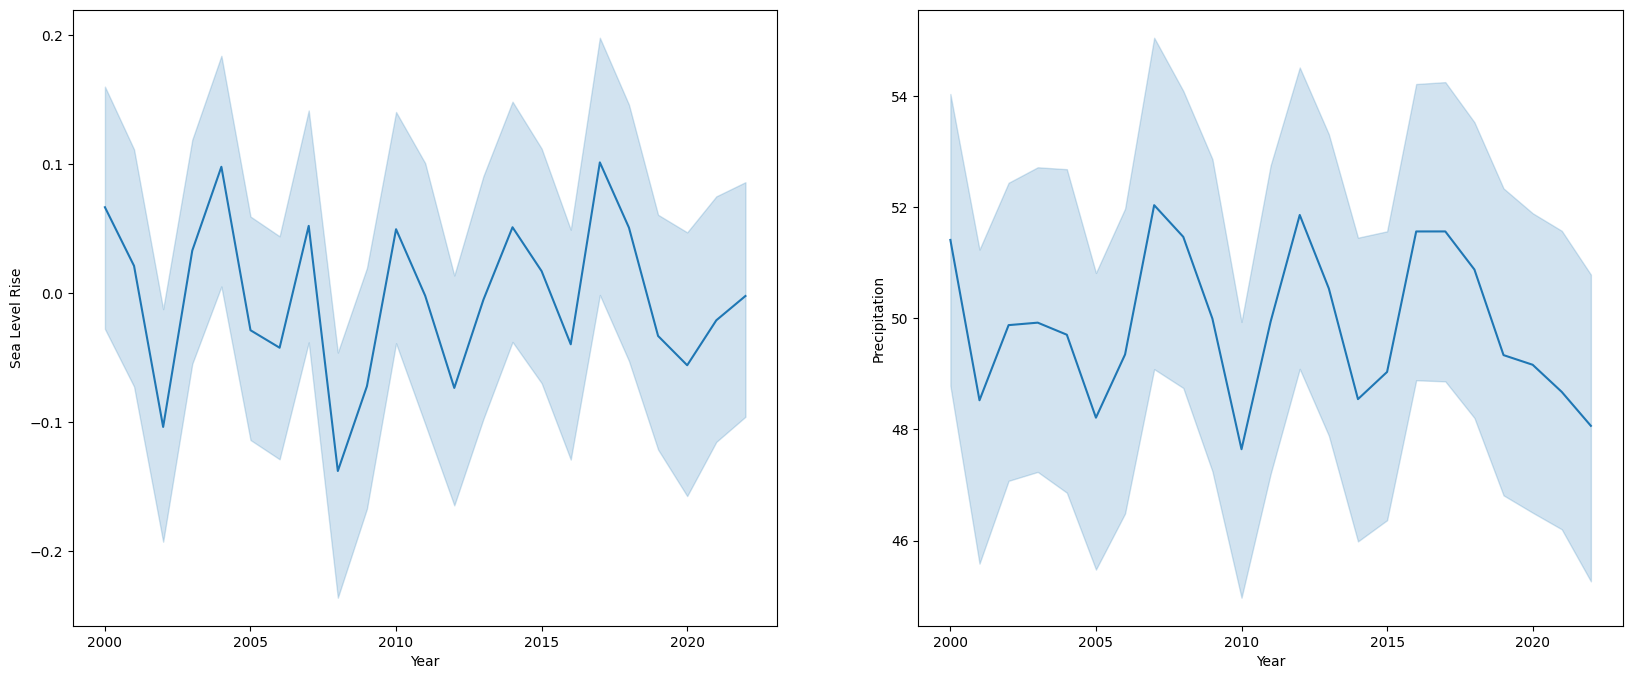

In [111]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Sea Level Rise',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Precipitation',data=df)


Similarly, in this block of code, I am creating another figure with a size of 20x8 inches and arranging two line plots side by side. The first line plot represents the relationship between 'Year' and 'Sea Level Rise', while the second one shows the relationship between 'Year' and 'Precipitation'. These line plots help in visualizing how these environmental variables change over the years.

<Axes: xlabel='Year', ylabel='Wind Speed'>

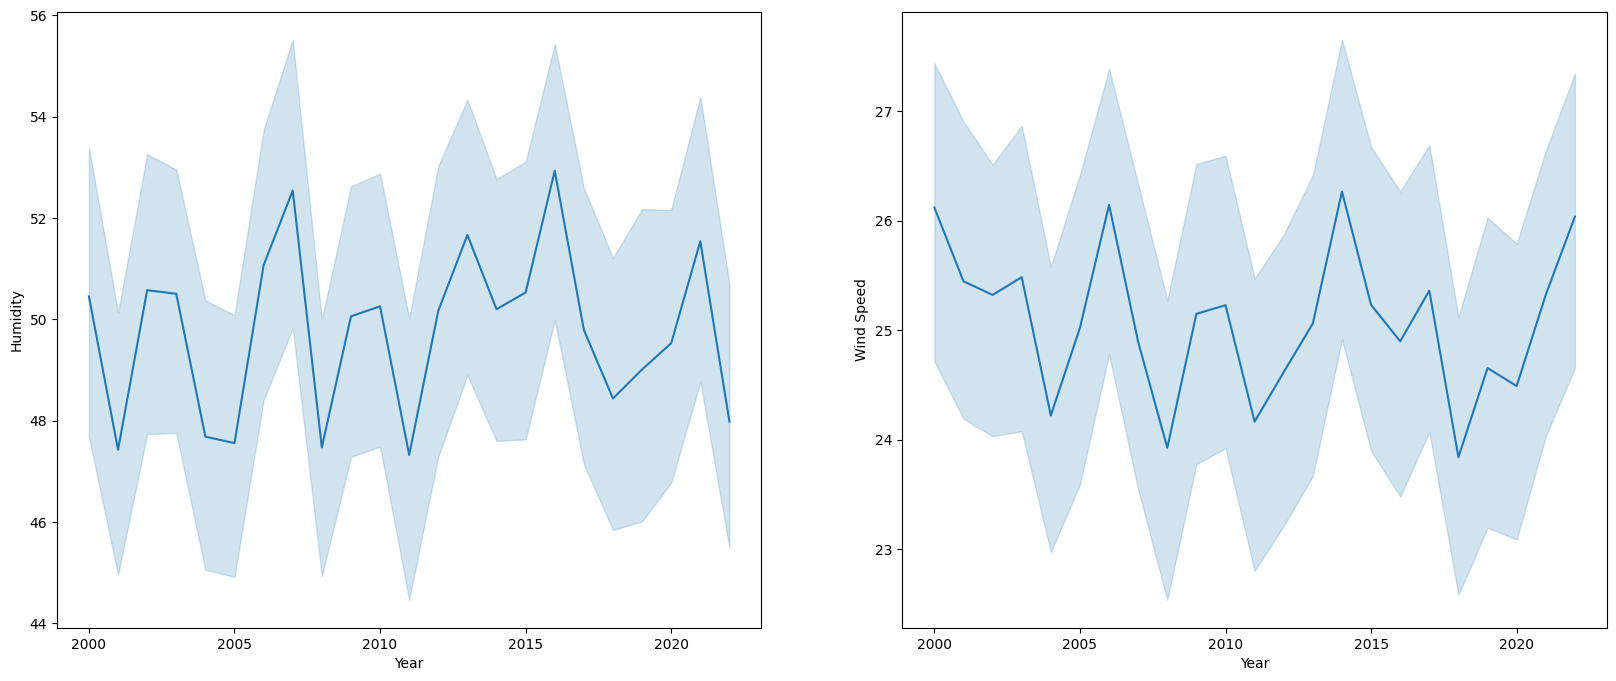

In [112]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
sns.lineplot(x='Year',y='Humidity',data=df)
plt.subplot(1,2,2)
sns.lineplot(x='Year',y='Wind Speed',data=df)


In the last block, I am creating another figure with two line plots side by side. The first line plot represents the relationship between 'Year' and 'Humidity', while the second one shows the relationship between 'Year' and 'Wind Speed'. These visualizations allow for a better understanding of how humidity and wind speed vary over the years.

In [113]:
print(df.dtypes)

numeric_columns = df.select_dtypes(include=['number']).columns
correlations = df[numeric_columns].corr()

correlations = numeric_df.corr()

Date              datetime64[ns]
Location                  object
Country                   object
Temperature              float64
CO2 Emissions            float64
Sea Level Rise           float64
Precipitation            float64
Humidity                 float64
Wind Speed               float64
Date Only                 object
Year                       int32
dtype: object


NameError: name 'numeric_df' is not defined

The dtypes attribute is used to display the data types of each column in the DataFrame. This information is crucial for identifying whether columns contain numerical or non-numerical (e.g., strings) data.
I create a subset of the DataFrame, numeric_columns, containing only the columns with numeric data types. This is essential for accurate correlation calculations.
I calculate correlations between numeric columns in the original DataFrame (df). This ensures that only columns with numeric data types are considered in the correlation analysis.

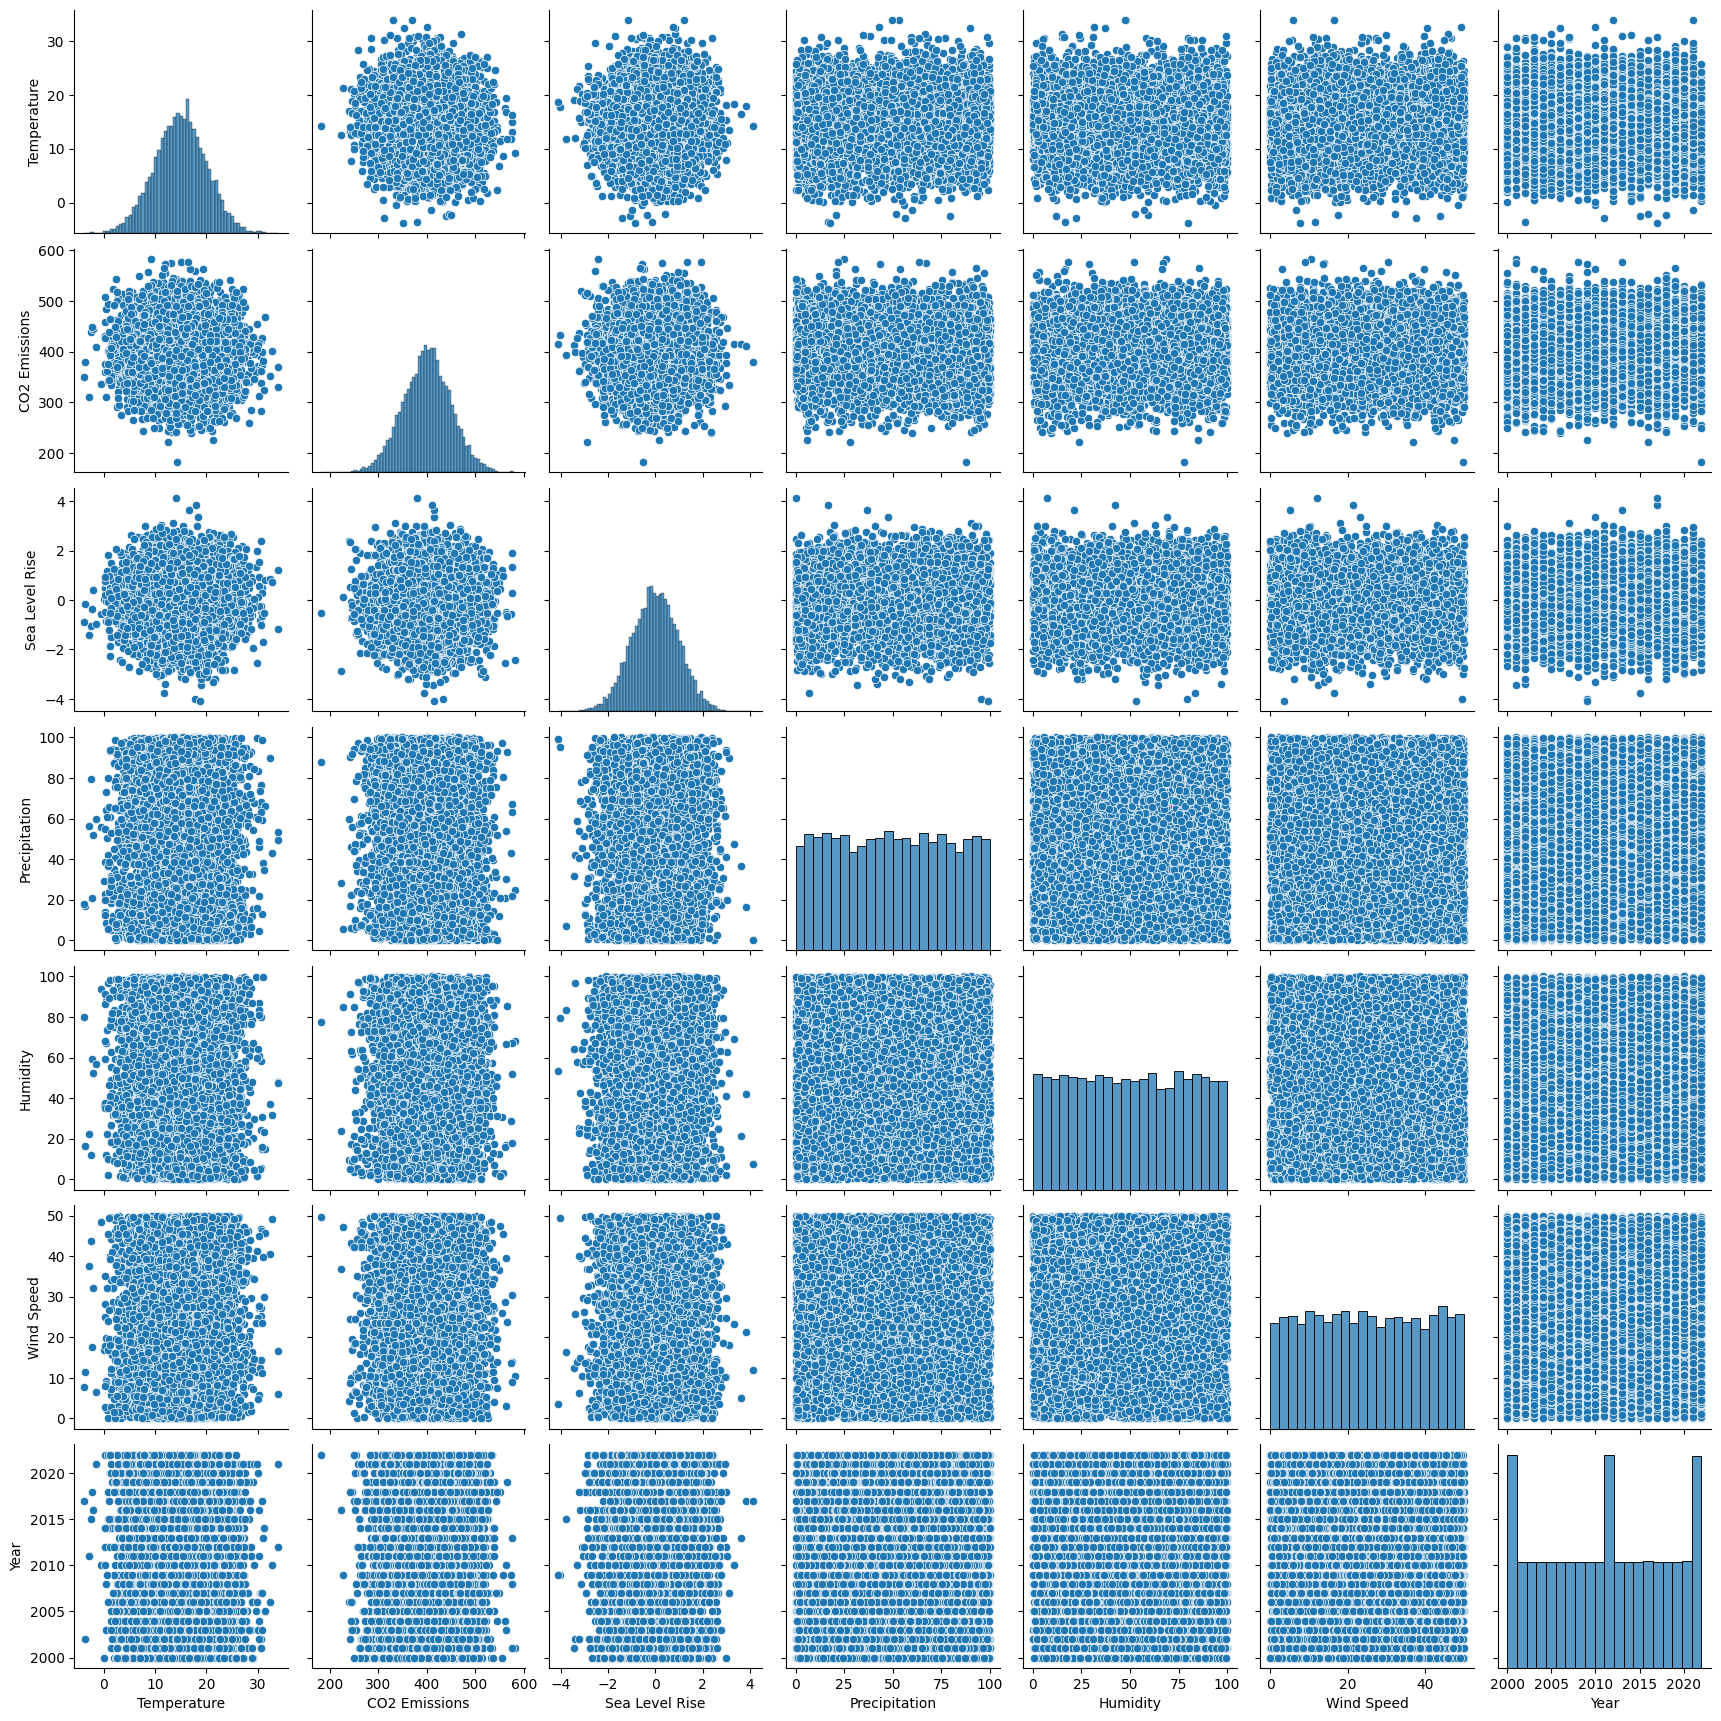

In [ ]:
sns.pairplot(df)

The pairplot function from Seaborn is used to create a matrix of scatterplots, with each scatterplot showing the relationship between two numerical variables in the DataFrame df. The diagonal contains histograms for each variable, and the scatterplots provide a visual representation of the pairwise relationships between variables. This is useful for identifying potential patterns and correlations in the data.

In [ ]:
import pandas as pd
import numpy as np

# Read the data
df = pd.read_csv('climate_change_data.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Define target variable
target_variable = 'Temperature'

# Extract features (X) and target variable (y)
X = df.drop([target_variable, 'Date', 'Location', 'Country'], axis=1)
y = df[target_variable]

# Split data into training and testing sets
np.random.seed(42)  # for reproducibility
mask = np.random.rand(len(df)) < 0.8
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

# Standardize the features manually
mean_X_train = X_train.mean()
std_X_train = X_train.std()
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled = (X_test - mean_X_train) / std_X_train

# Linear regression model
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_with_intercept = np.column_stack((np.ones(len(X)), X))
        coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        self.intercept = coefficients[0]
        self.coefficients = coefficients[1:]

    def predict(self, X):
        return self.intercept + X @ self.coefficients

# Train the linear regression model
model = LinearRegressionModel()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 25.411749404829617


Data Loading and Preprocessing:
Reads climate change data from a CSV file into a Pandas DataFrame.
Converts the 'Date' column to datetime format.
Selects the 'Temperature' as the target variable and extracts features (X) and the target variable (y).

Train-Test Split:
Divides the dataset into training and testing sets, with 80% for training and 20% for testing.

Manual Standardization:
Standardizes the features manually, subtracting the mean and dividing by the standard deviation.
Calculates the mean and standard deviation using the training set.

Linear Regression Model:
Implements a simple linear regression model from scratch (LinearRegressionModel).
Trains the linear regression model using the standardized training set.

Prediction and Evaluation:
Predicts the target variable values on the test set using the trained model.
Computes the Mean Squared Error (MSE) between predicted and actual values.
Prints the calculated MSE, providing an assessment of the model's performance.

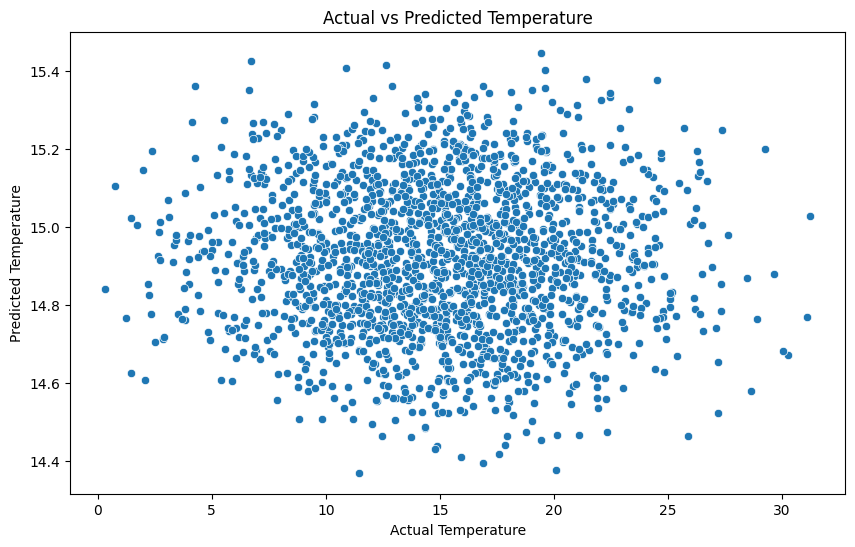

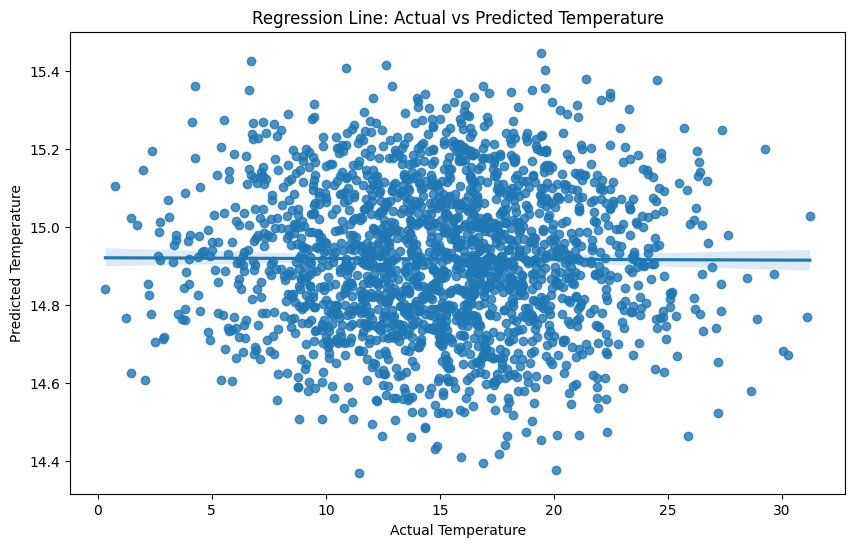

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Regression Line: Actual vs Predicted Temperature')
plt.show()


In [ ]:
!pip install tensorflow


     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
     --- ------------------------------------ 0.1/1.5 MB 3.5 MB/s eta 0:00:01
     ----------- ---------------------------- 0.4/1.5 MB 4.6 MB/s eta 0:00:01
     --------------------------- ------------ 1.0/1.5 MB 8.0 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/151.7 kB ? eta -:--:--
     ---------------------------------------- 151.7/151.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.9/300.9 MB 19.0 MB/s eta 0:00:16
   ------------

Mean Squared Error on Test Set: 25.411749404829617


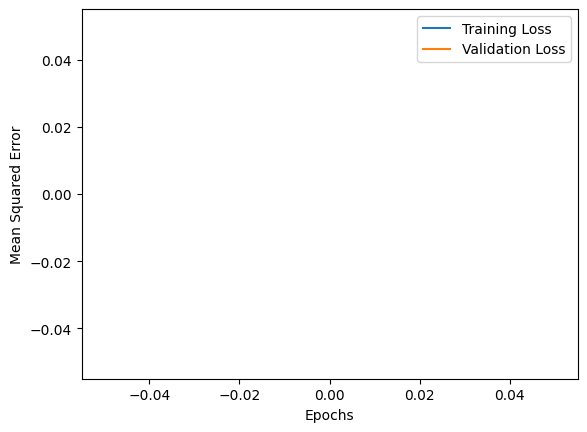

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('climate_change_data.csv')
df['Date'] = pd.to_datetime(df['Date'])

# Define target variable
target_variable = 'Temperature'

# Extract features (X) and target variable (y)
X = df.drop([target_variable, 'Date', 'Location', 'Country'], axis=1)
y = df[target_variable]

# Train-test split
np.random.seed(42)
mask = np.random.rand(len(df)) < 0.8
X_train, X_test = X[mask], X[~mask]
y_train, y_test = y[mask], y[~mask]

# Standardize features
mean_X_train = X_train.mean()
std_X_train = X_train.std()
X_train_scaled = (X_train - mean_X_train) / std_X_train
X_test_scaled = (X_test - mean_X_train) / std_X_train

# Define a simple linear regression model
class LinearRegressionModel:
    def __init__(self):
        self.coefficients = None
        self.intercept = None

    def fit(self, X, y):
        X_with_intercept = np.column_stack((np.ones(len(X)), X))
        coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
        self.intercept = coefficients[0]
        self.coefficients = coefficients[1:]

    def predict(self, X):
        return self.intercept + X @ self.coefficients

# Train the linear regression model
model = LinearRegressionModel()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = np.mean((y_test - y_pred) ** 2)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot training and validation loss over epochs (not applicable in this case)
plt.plot([0], label='Training Loss')  # placeholder
plt.plot([0], label='Validation Loss')  # placeholder
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


Mean Squared Error on Test Set: 25.755635371031094


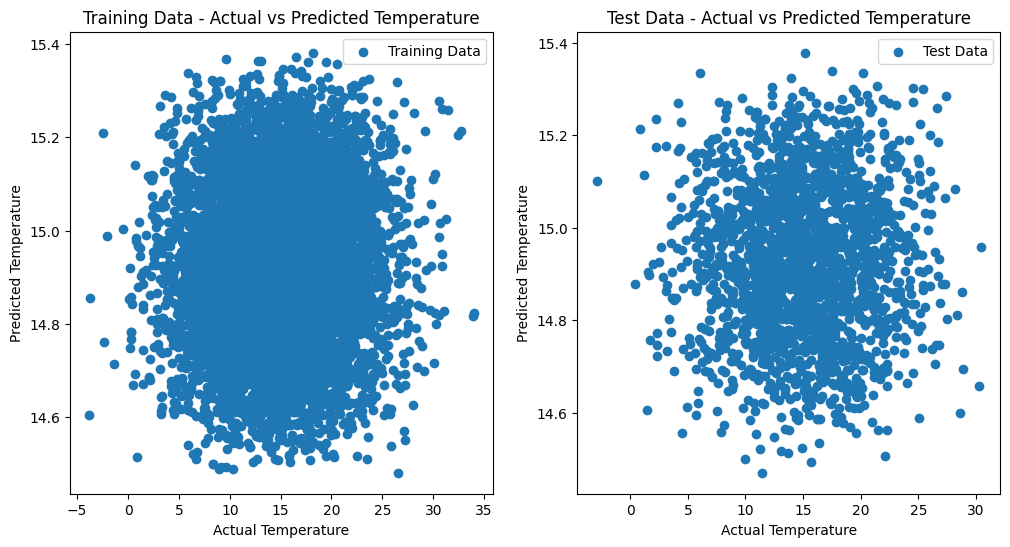

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('climate_change_data.csv')

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Define target variable
target_variable = 'Temperature'

# Separate features (X) and target variable (y)
X = df.drop([target_variable, 'Date', 'Location', 'Country'], axis=1)
y = df[target_variable]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train a linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

# Plot training history (for linear regression, it's not an epoch-based process)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, model.predict(X_train_scaled), label='Training Data')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Training Data - Actual vs Predicted Temperature')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, label='Test Data')
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Test Data - Actual vs Predicted Temperature')
plt.legend()

plt.show()



In [ ]:
pip install pandas scikit-learn matplotlib seaborn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/fe/6b/db949ed5ac367987b1f250f070f340b7715d22f0c9c965bdf07de6ca75a3/scikit_learn-1.3.2-cp312-cp312-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/c6/a1/357e4cd43af2748e1e0407ae0e9a5ea8aaaa6b702833c81be11670dcbad8/scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.4 kB 495.5 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 643.1 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 f


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Mean Squared Error: 30.79885928932866


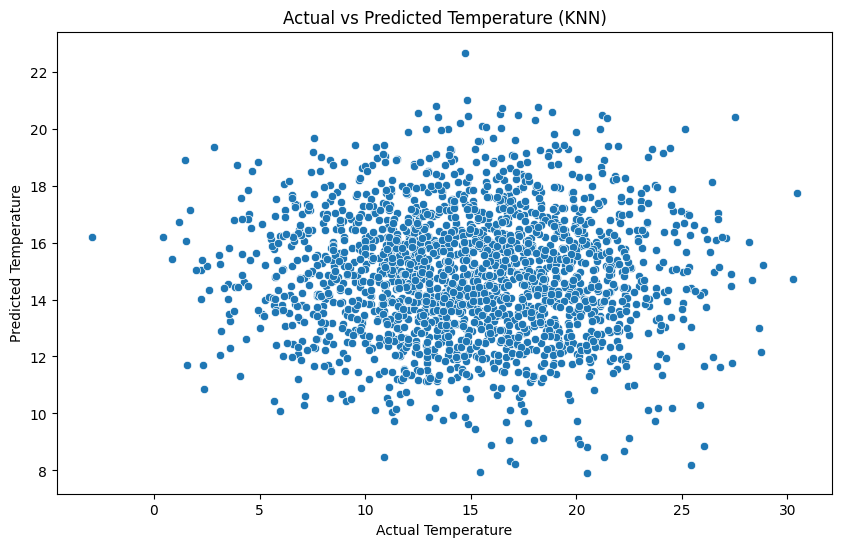

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_change_data.csv')

target_variable = 'Temperature'

X = df.drop([target_variable, 'Date', 'Location', 'Country'], axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (KNN)')
plt.show()


         Actual  Predicted
6252  20.234153  13.515627
4684  20.371284  15.900444
1731  18.957908  16.868158
4742  13.589715  18.348273
4521  20.913059  12.624402


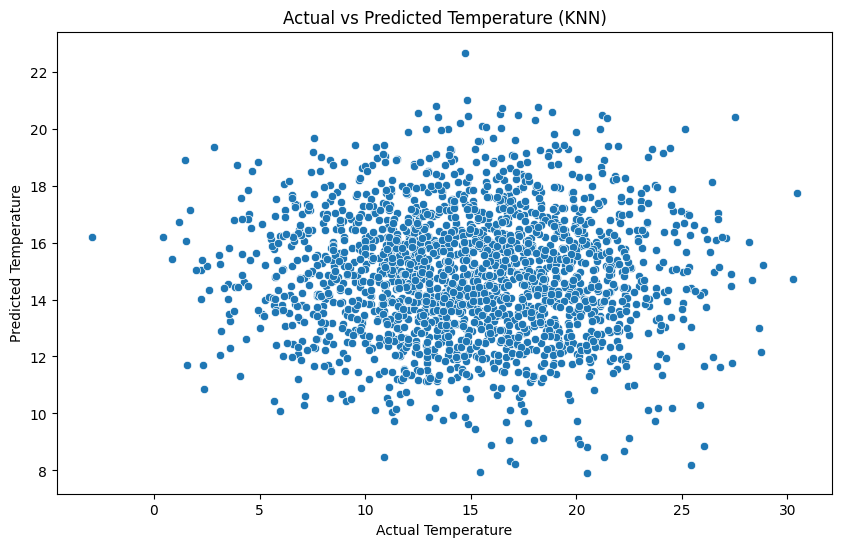

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('climate_change_data.csv')

target_variable = 'Temperature'

X = df.drop([target_variable, 'Date', 'Location', 'Country'], axis=1)
y = df[target_variable]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model = KNeighborsRegressor(n_neighbors=5) 
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

print(results_df.head())

plt.figure(figsize=(10, 6))
sns.scatterplot(x=results_df['Actual'], y=results_df['Predicted'])
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted Temperature (KNN)')
plt.show()
